In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as sps
import pandas as pd
import cupy
%matplotlib widget

from scipy.constants import h, c, k


# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

In [2]:
def blackbody_radiation_dimless(nu, temperature):
    """Calculate blackbody radiation as a function of wavelength and temperature.""" 
    return np.sqrt(eta * 8 * np.pi * h * nu**3/(c**2)* 1/(np.exp(h*nu/(k*temperature))-1))

/tmp/ipykernel_5386/3461091548.py:5: RuntimeWarning: overflow encountered in exp
  return np.sqrt(eta * 8 * np.pi * h * nu**3/(c**2)* 1/(np.exp(h*nu/(k*temperature))-1))


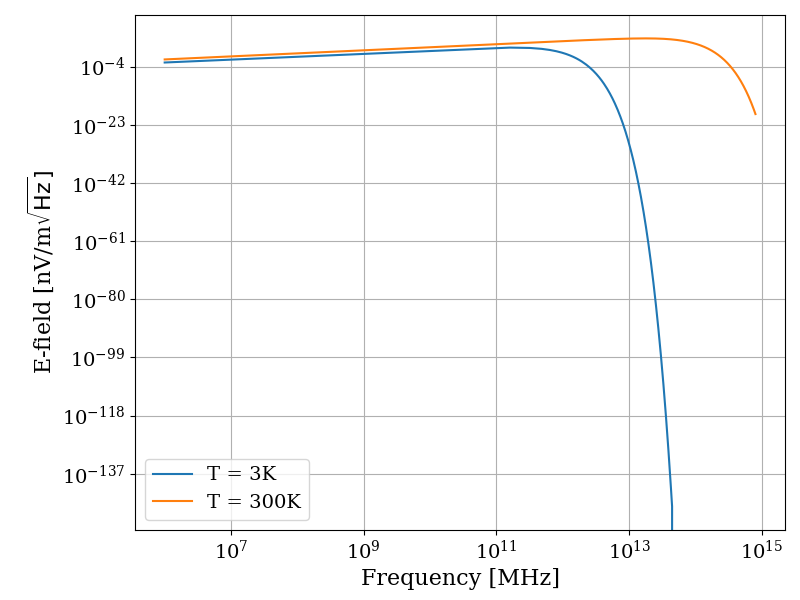

In [3]:
# Define the blackbody radiation function
def blackbody_radiation(nu, temperature):
    """Calculate blackbody radiation as a function of wavelength and temperature.""" 
    eta = 377 # Ohms
    return np.sqrt(eta * 8 * np.pi * h * nu**3/(c**2)* 1/(np.exp(h*nu/(k*temperature))-1))

# Define the range of freqs (in Hz)
nu = np.linspace(1e6, 8e14, 5000)  # from 1 nm to 3 µm

# Temperature in Kelvin
temperature = 300

# Calculate the blackbody radiation
EperRtHz = blackbody_radiation(nu, temperature)

plt.close('all')
# Plot the blackbody radiation curve
plt.figure(figsize=(8, 6))
plt.plot(nu,blackbody_radiation(nu, temperature=3)/1e-9, label=f'T = {3}K') 
plt.plot(nu,blackbody_radiation(nu, temperature=300)/1e-9, label=f'T = {300}K')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'E-field [nV/m$\sqrt{\mathrm{Hz}}]$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.loglog()
plt.show()

In [4]:
#this is really in system design section
from scipy.interpolate import interp1d

# Load data from the text file
filename = './comPowerAF10m.txt'
data_from_file = np.loadtxt(filename, delimiter=',')
AF_freqs = data_from_file[:, 0]
AF = data_from_file[:, 1]

fileName         = '/drBiggerBoy/run1p4/plottingSpec/chA_avg_W_switch1.npy' 
freqs       = np.linspace(0,400,2**23+1)[1:-1]
data = np.load(fileName)[1:-1]


# Interpolating the Antenna Factor
AF_interp = np.interp(freqs, AF_freqs, 10**(AF/20))
#plt.plot(freqs, AF_interp)


# Conversion function from dBm to V/m with interpolated antenna factor
def V_per_m_to_dBm(Vpm):
    volt = Vpm/AF_interp 
    powerW = volt**2/50
    powerdBm = 10*np.log10(powerW*1000)
    return powerdBm



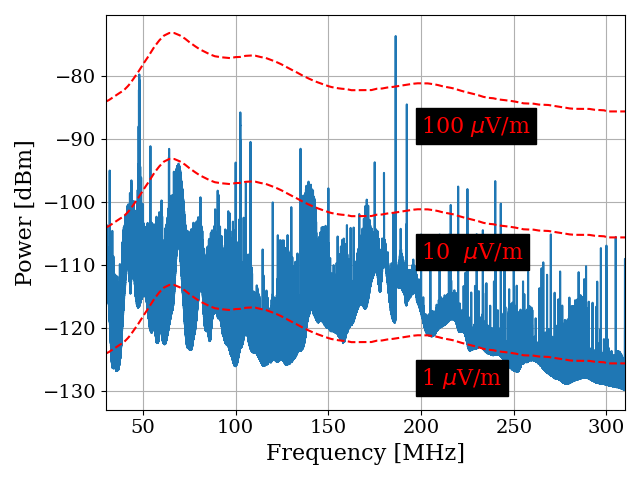

In [5]:
plt.close('all')
# Plotting the original data
plt.plot(freqs, 10 * np.log10(data * 1000), label='Power [dBm]')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(True)


# Reference lines in dBm
field_strength_values = [1e-4,1e-5,1e-6]

for Vpm in field_strength_values:
    dBm = V_per_m_to_dBm(Vpm)
    plt.plot(freqs, dBm, 'r--')

#plt.text(275, -73.5 , f'1 mV/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -90 , r'100 $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -110 , r'10  $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -130 , r'1 $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')


plt.tight_layout()
plt.xlim(30,310)
plt.show()

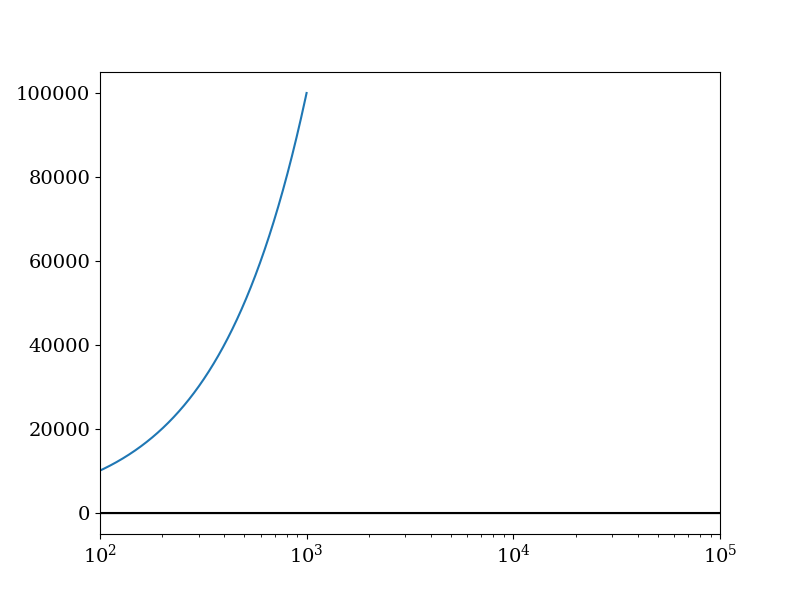

In [7]:
#first attempt at remaking John's plot

# Generate data 
time = np.linspace(100, 1e5, 1000)

deltaNu = 50 #Hz
signalPow = 1e-24 #W
noise = 3.9e-22 #W


#signal = 10 / np.sqrt(time)
#uncertainty = signal   

# Plotting
plt.figure(figsize=(8, 6))

# Plot the main signal
plt.plot(time,np.repeat(signalPow,len(time)), 'black', label='Signal')

# Plot the uncertainty as a shaded area
plt.fill_between(time, signalPow *(1+ 1/np.sqrt(time*deltaNu)),  signalPow*(1 - 1/np.sqrt(time*deltaNu)), color='gray', alpha=0.5)

plt.plot(time, )
'''
# Plot the uncertainty as a shaded area
plt.fill_between(time, 10- uncertainty, 10 + uncertainty, color='gray', alpha=0.5)

# Add a horizontal line at y=10
plt.axhline(y=10, color='k')

# Add a vertical dashed line at x=1000 and highlight the range 900-1100
plt.axvline(x=1000, color='k', linestyle='--')
plt.axvspan(900, 1100, color='red', alpha=0.3)

# Set scale and labels
plt.xscale('log')
plt.ylim(0, 20)
plt.xlabel('Time')
plt.ylabel('Measured Signal (mV)')
'''
plt.xlim(1e2,1e5)
plt.semilogx()
plt.show()
